In [42]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

plt.style.use('ggplot')
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

In [2]:
month_code = ['1609459200', '1612137600', '1614556800', '1617235200','1619827200', 
              '1622505600', '1625097600','1627776000', '1630454400', '1633046400', '1635724800', '1638316800', '1640995200', '1643673600', '1646092800', '1648771200', '1651363200', '1654041600']

In [ ]:
# v-tuver 하나만 해보기

In [3]:
html=requests.get('https://playboard.co/youtube-ranking/most-viewed-v-tuber-channels-in-south-korea-monthly?period=1609459200')
soup=BeautifulSoup(html.text, 'html.parser')

print( soup.find('td', {'class':'name'}).text ) # 이름 추출
print( soup.find('td', {'class':'score'}).text ) # 조회수 추출

ShiningStar #샤이닝스타  #Vtuber 
2,549,400


In [4]:
v_tuber_name_list = []
v_tuber_views_list = []

for i in range(18): # 2021.01 ~ 2022.06
    html=requests.get('https://playboard.co/youtube-ranking/most-viewed-v-tuber-channels-in-south-korea-monthly?period=' + month_code[i])
    soup=BeautifulSoup(html.text, 'html.parser')
    
    v_tuber_name_list.append(soup.find('a', {'class':'name__label'}).text)
    v_tuber_views_list.append(soup.find('td', {'class':'score'}).text)

In [5]:
v_tuber_DF = pd.DataFrame({'채널명':v_tuber_name_list, '조회수':v_tuber_views_list})
v_tuber_DF.index = pd.period_range('2021-01-01', '2022-06-01', freq='M')

In [6]:
v_tuber_DF

,채널명,조회수
2021-01,ShiningStar,"2,549,400"
2021-02,아구이뽀 A924,"3,876,929"
2021-03,아구이뽀 A924,"3,477,273"
2021-04,요극,"3,411,560"
2021-05,홀로라이브KR 번역&자막,"981,984"
2021-06,오리고기 ORIGOGI,"11,869,237"
2021-07,오리고기 ORIGOGI,"14,107,080"
2021-08,오리고기 ORIGOGI,"14,539,309"
2021-09,번역하는 댕댕이,"2,087,741"
2021-10,번역하는 댕댕이,"3,194,764"


# -----------------------------------------------------

In [8]:
# V-Tuber, 트럭커, 스니커즈, 애완동물/동물, 음악, 게임, 뉴스/정치 토픽 채널에 적용

In [ ]:
def get_name_views():
    topic_list

In [9]:
topic_list = ['v-tuber', 'trucker', 'sneakers', 'animals', 'music', 'gaming', 'news']
utube_name_list = []
utube_views_list = []

for topic in topic_list:
    for month in month_code:
        html=requests.get(f'https://playboard.co/youtube-ranking/most-viewed-{topic}-channels-in-south-korea-monthly?period=' + month)
        soup=BeautifulSoup(html.text, 'html.parser')
        
        if soup.find('tr', {'class':'chart__row'}) is not None: # 더 상위
            utube_name_list.append(soup.find('a', {'class':'name__label'}).text)
            utube_views_list.append(soup.find('td', {'class':'score'}).text)
        
        else:
            utube_name_list.append(np.nan)
            utube_views_list.append(np.nan)

In [10]:
# utube = pd.DataFrame({'채널명':utube_name_list, '조회수':utube_views_list}) => DF 하나에 다 넣음.

# 딕셔너리를 이용해 구분하여 DataFrame 만들기
df_dict = {}
for i in range(len(topic_list)):
    topic = topic_list[i]
    df_dict[topic] = pd.DataFrame({'채널명': utube_name_list[18*i:18*(i+1)], '조회수':utube_views_list[18*i:18*(i+1)]}, index=pd.period_range('2021-01-01', '2022-06-01', freq='M'))
# df_dict는 dict 타입, df_dict['v-tuber']는 DataFrame 타입

In [11]:
# csv 파일 만들기
for topic in topic_list:
    df_dict[topic].to_csv(f'{topic}_view_top.csv', encoding = 'utf-8', index=True)

In [ ]:
# 콤마 제거 -> int로 변환(하나만 해보기)
# df_dict['v-tuber']['조회수'].str.replace(',','')
# df_dict['v-tuber']['조회수'].str.replace(',','').apply(pd.to_numeric)

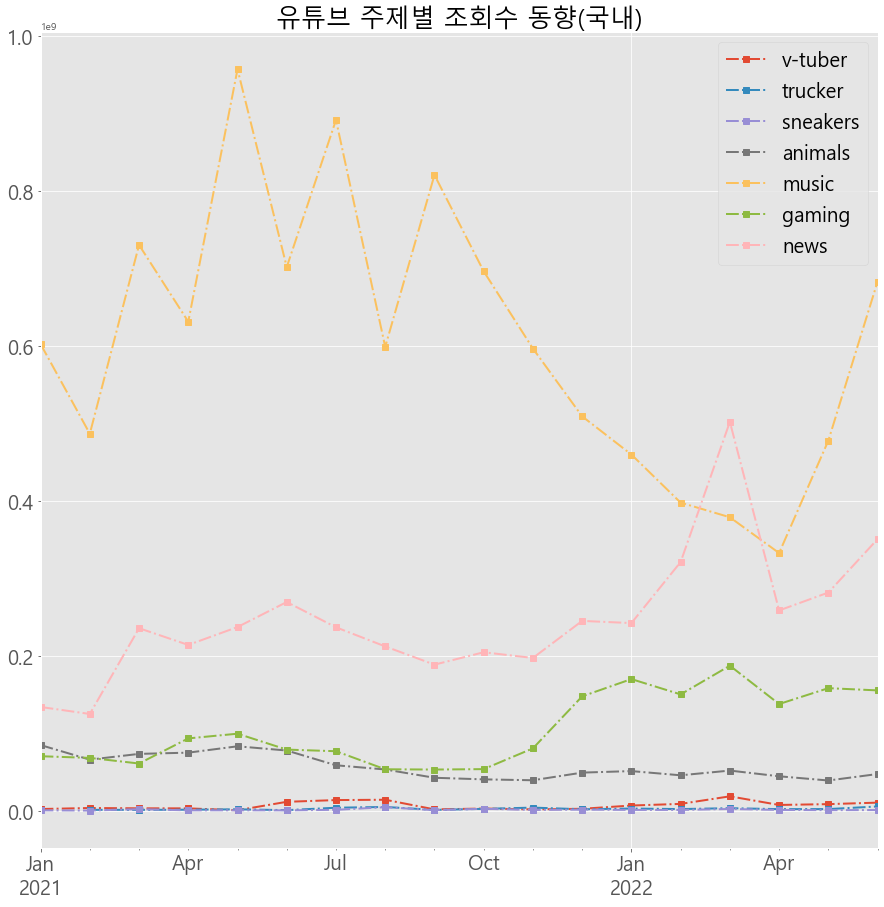

In [224]:
# 그래프
plt.figure(figsize=(15, 15))

for topic in topic_list:
    df_dict[topic]['조회수'].str.replace(',','').apply(pd.to_numeric).plot(marker='s', fontsize=20, linewidth=2, linestyle='dashdot')
plt.legend(topic_list, fontsize=20)
plt.title('유튜브 주제별 조회수 동향(국내)', fontsize=25)
plt.show()
# https://playboard.co/channel/UCdrBnBNLsN4_cH32HWbr9qg
# 세대를 아우르는 공통된 관심사에 대한 영상이 조회수가 잘 나옴.

# ---------------제목 수 평균 구하기---------------------


In [47]:
# 토픽 : 게임 부문에서 평균 조회수가 가장 높은 채널
df_dict['gaming']
# https://playboard.co/channel/UCdrBnBNLsN4_cH32HWbr9qg

,채널명,조회수
2021-01,계향쓰 GH'S,"70,698,418"
2021-02,계향쓰 GH'S,"68,531,997"
2021-03,계향쓰 GH'S,"61,272,575"
2021-04,계향쓰 GH'S,"93,683,886"
2021-05,계향쓰 GH'S,"99,755,194"
2021-06,계향쓰 GH'S,"79,231,599"
2021-07,계향쓰 GH'S,"77,140,020"
2021-08,탁주 TV,"53,847,260"
2021-09,계향쓰 GH'S,"53,492,439"
2021-10,계향쓰 GH'S,"54,046,401"


In [48]:
top_channel = {'한문철TV':'UCH5U89kvHrVxxS80xpoOydw', '스마일밤 Smile Bam':'UCKo9E6a6-E40CC6OdSbvcdA', 
 'Jane ASMR 제인':'UC2fsxQr6Hcx1enORxXgKpxQ', "계향쓰 GH's":'UCdrBnBNLsN4_cH32HWbr9qg',
'ITSub':'UCdUcjkyZtf-1WJyPPiETF1g'}

In [119]:
## 하나만 해보기
gaming_html = requests.get('https://playboard.co/channel/UCdrBnBNLsN4_cH32HWbr9qg/videos?sortTypeId=20') # => PLAYBOARD에서 계향쓰 GH's 정보
gaming_soup = BeautifulSoup(gaming_html.text, 'html.parser')
gaming_soup.find_all('h3')

[<h3 data-v-f27e19ae="">나는 괴물이 아니야 - 파피 플레이타임 애니메이션 (Wanna Live)</h3>,
 <h3 data-v-f27e19ae="">뮤직 애니메이션 컴플리트 에디션 - 프레디의 피자가게 : 시큐리티 브리치 애니메이션</h3>,
 <h3 data-v-f27e19ae="">헬로, 어게인 - 프레디의 피자가게 : 시큐리티 브리치 애니메이션</h3>,
 <h3 data-v-f27e19ae="">먹방 vs 프라이데이 나이트 펑킨 컴플리트 에디션 #1</h3>,
 <h3 data-v-f27e19ae="">두 얼굴 - 프레디의 피자가게 : 시큐리티 브리치 애니메이션</h3>,
 <h3 data-v-f27e19ae="">나는 괴물이 아니야 2 - 파피 플레이타임 애니메이션 (Can't I even dream?)</h3>,
 <h3 data-v-f27e19ae="">파피 플레이타임 랭커, but..</h3>,
 <h3 data-v-f27e19ae="">먹방 vs 프라이데이 나이트 펑킨 TOP10 컴플리트 에디션</h3>,
 <h3 data-v-f27e19ae="">몬티 슈트 업 - 프레디의 피자가게 : 시큐리티 브리치</h3>,
 <h3 data-v-f27e19ae="">먹방 vs 프라이데이 나이트 펑킨 3 (feat. ruv, lila)</h3>,
 <h3 data-v-f27e19ae="">어몽어스 컵송 컴플리트 에디션 #7</h3>,
 <h3 data-v-f27e19ae="">먹방 vs 프라이데이 나이트 펑킨 2 (feat. whitty)</h3>,
 <h3 data-v-f27e19ae="">두 얼굴 2 (Darkside) - 프레디의 피자가게 : 시큐리티 브리치 애니메이션</h3>,
 <h3 data-v-f27e19ae="">치카 슈트 업 | 컴플리트 에디션 - 프레디의 피자가게 : 시큐리티 브리치</h3>,
 <h3 data-v-f27e19ae="">어몽어스 컵송 컴플리트 에디션 #4</h3>,
 <h3 data-v-f27e19ae

In [124]:
# 전체에 적용
title_list=[]
for i in top_channel.values():
    top_title_html = requests.get(f'https://playboard.co/channel/{i}/videos?sortTypeId=20')
    title_soup = BeautifulSoup(top_title_html.text, 'html.parser')

    title_all = title_soup.find_all('h3')
    for t in title_all:
        title_list.append(t.text)
print(title_list)

['#113. 차가 지나가면 사람이 서라?  #shorts', '#6. 아 천천히 오세요!! 앞에 차 있거든여?!  #shorts', '#263. 도망가자~ #shorts', '5786회.응급 환자 태운 구급차를 막은 택시 기사.   환자는 이송 5시간에 사망.', '#9. 경찰 피해 도주하던 오토바이... 그 결과는? #shorts', '5877회. 있을 수 없는 일이 일어났습니다. 신호위반 안 했는데 왜 벌점과 범칙금을 부과합니까?', '#360. KTX가 오고 있는데 길을 막은 택시 #shorts', '6555회. 문을 부술 듯이 두들기다가 덩치 큰 제가 내리니까 꼬랑지를 내리네요. 경찰에 신고한다니까 도망갑디다. 따끔하게 혼내주고 싶습니다!', '#75 아주머니! 왜 그러셨어요~ #shorts', '#496. 어? 사람 쳤다! 잡을 테니 비켜봐요! #shorts', '1915회. (투표, 858회 속보) 고속도로에서 정상적으로 달리는 대형트럭 앞으로 승용차가 들어오더니 휘청휘청거려 6초 만에 쾅~ 조사관과 지방경찰청은 트럭을 가해차량 지정', '#12. (한문철TV 귀로 듣는 중) 중앙선 넘어 추월하더니 얼마 못가 다시 만남...#shorts', '#80 위협운전 트레일러, 난폭운전죄로 신고가능합니다 #shorts', '#140. 빵 한번 했다가 욕을 배부르게... #shorts', '#30. 마른하늘에 날벼락 #shorts', '#236. 뒤집어진 테슬라..ㄷㄷ #shorts', '#52. 죽을죄를 지었습니다 그렇지만 너무 억울합니다, #shorts', '#688. 내 앞에서 와이프 차가 사고나는걸 목격한다면 #shorts', '5870회. 자전거 탄 아이가 와서 박았는데, 100만원 안 주면 민식이법으로 신고한다고 해서 70만원에 합의했습니다.', '#614. 뒤차 인성 보소.. #shorts', '몇대몇?블랙박스', '그것이 블랙박스', '도로위참견시점[ 도참시TV ]', '맨인블박', '이모저모TV', '한문철Live', 'Indie88', 'B

In [209]:
print(title_list[0])
print(len(title_list[0]))
print(title_list[0].count(' '))

#113. 차가 지나가면 사람이 서라?  #shorts
30
6


In [212]:
len_title_list = []
for i in title_list:
    len_title_list.append(len(i)-i.count(' '))
len_title_list

[24,
 28,
 17,
 35,
 30,
 42,
 27,
 63,
 22,
 28,
 78,
 44,
 32,
 27,
 19,
 23,
 32,
 31,
 53,
 20,
 8,
 7,
 14,
 4,
 6,
 7,
 7,
 8,
 20,
 4,
 64,
 69,
 68,
 80,
 71,
 70,
 74,
 57,
 65,
 78,
 78,
 57,
 75,
 79,
 79,
 76,
 81,
 75,
 80,
 70,
 9,
 11,
 9,
 9,
 14,
 14,
 11,
 4,
 12,
 16,
 81,
 79,
 68,
 75,
 74,
 81,
 80,
 78,
 81,
 83,
 82,
 75,
 77,
 77,
 84,
 77,
 82,
 82,
 71,
 75,
 12,
 14,
 12,
 11,
 8,
 9,
 13,
 11,
 6,
 12,
 32,
 36,
 28,
 23,
 25,
 40,
 15,
 26,
 22,
 30,
 15,
 28,
 36,
 30,
 15,
 22,
 29,
 35,
 14,
 15,
 12,
 12,
 2,
 3,
 11,
 5,
 18,
 9,
 6,
 10,
 42,
 39,
 60,
 44,
 42,
 48,
 36,
 45,
 40,
 35,
 54,
 34,
 49,
 36,
 53,
 39,
 38,
 50,
 47,
 44,
 6,
 8,
 9,
 5,
 8,
 9,
 11,
 8,
 17,
 3]

In [213]:
# 5개 상위 채널 제목의 전체 글자수 평균
round( sum(len_title_list) / len(len_title_list), 2 )

36.99

## 개인유튜버가 하기좋은 토픽 중 5개 상위 채널 제목의 전체 글자수 평균 = > 45.33개

In [218]:
# 채널별 제목 글자수 평균
for i in range(5):
    by_topic_title = title_list[30*i:30*(i+1)]
    by_topic_len_list = []
    for j in by_topic_title:
        by_topic_len_list.append(len(j)-j.count(' '))
    print(round( sum(by_topic_len_list) / len(by_topic_len_list), 2 ))

25.33
51.83
55.67
20.13
31.97


### 'gaming', 계향쓰 GH's => 25.2(20.7)
### 'science', ITSub => 40.4(31.97)
### 'makeup', 스마일밤 => 63.9(51.83)
### 'vehicles', 한문철TV => 30.7(25.33)
### 'mukbang', Jane ASMR 제인 => 66.47(55.67)

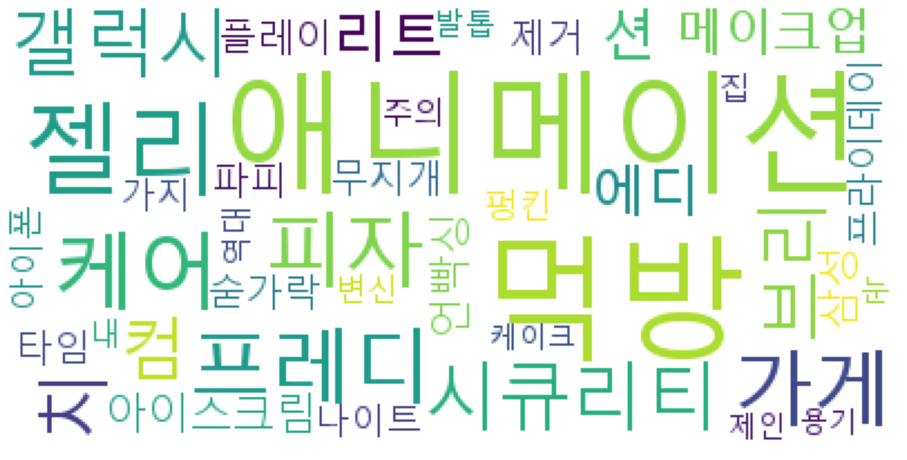

In [221]:
okt = Okt()

noun_adj_list = []
for data in title_list:
    sentences_tag = okt.pos(data)
    # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun']:
            noun_adj_list.append(word)
    
# print(noun_adj_list)
counts = Counter(noun_adj_list)
tags = counts.most_common(40)
# print(tags)

if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))


plt.figure(figsize=(16, 12))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## 제목 글자 수와 조회수는 크게 상관 없다.
## 영상의 목적을 제목에 명시하는 것도 좋은 방법이다.

In [ ]:
# 출처
# https://playboard.co/
# https://kr.noxinfluencer.com/
# https://www.youtube.com/